In [2]:
# Add directory above current directory to path
import sys

sys.path.insert(0, "..")

from sunflower.sunflower.song_loader import Song, load_from_disk
from  sunflower.sunflower.song_analyzer import SongAnalyzer
from  sunflower.sunflower.utils import export_wav
from  sunflower.sunflower.song_visualizer import visualize_waveform
import plotly.graph_objects as go
import numpy as np
import librosa
import soundfile as sf

# Autoreloading for easier development

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'sunflower.sunflower.song_loader'

## Song loading & analysis

In [12]:
# Loading example file

raw_audio, extension = load_from_disk("assets/Piano_Loops_PianoNoir_02_Ebmin_70.wav")

song = Song(raw_audio, extension)

song.print_attributes()

waveform: [[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.19302422e-06]
 [ 3.09944153e-06  0.00000000e+00]
 ...
 [-2.14669853e-06  4.52995300e-06]
 [-1.43144280e-06  1.66893005e-06]
 [ 0.00000000e+00  7.15255737e-07]], mono_waveform: [   0. -641. 1664. ... 1279.  127.  384.], extension: wav, channels: 2, sr: 44100, sample_width: 4


In [13]:
# Analyzing song

song_analyzer = SongAnalyzer(song)
song_analyzer.detect_tempo()

print(song_analyzer.tempo)

103.359375


In [14]:
song_analyzer.beat_frames

array([ 29,  76, 127, 187, 243, 298, 352, 400, 445])

## Waveform visualization

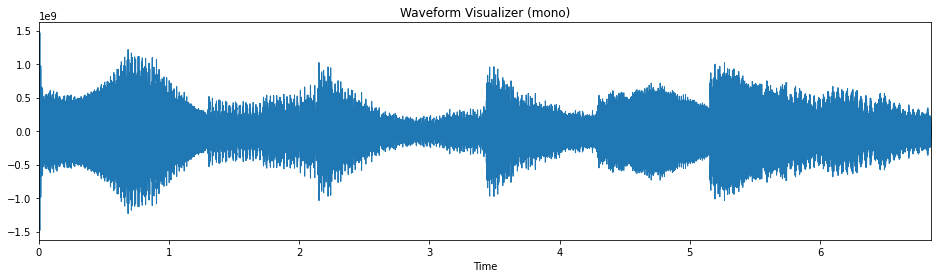

In [15]:
visualize_waveform(song)

In [16]:
stereo = False
rate = 30

left = [point[0] for point in song.waveform[0::rate]]
right = [point[1] for point in song.waveform[0::rate]]
mono = (np.array(left) + np.array(right)) / 2
x = np.arange(0, len(mono)) * rate / song.sr

if stereo:
    data = [
        go.Scatter(x=x, y=left, name="Left"),
        go.Scatter(x=x, y=right, name="Right"),
    ]
else:
    data = [go.Scatter(x=x, y=mono, name="Mono")]

fig = go.Figure(data=data)

beats = librosa.frames_to_time(song_analyzer.beat_frames, song.sr)

fig.add_trace(
    go.Scatter(
        x=beats,
        y=np.zeros(len(beats)),
        mode="markers",
        marker_symbol="diamond-tall",
        marker_size=10,
        name="Beat Rythm"
    )
)

fig.update_layout(title=f"Waveform Visualizer <br>BPM :{round(song_analyzer.tempo,0)}")
fig.show()